In [1]:
# Dependencies
import tweepy
import json
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from config import (consumer_key, consumer_secret, access_token, access_token_secret)

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [2]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [29]:
search_terms = {"@BBCNews","@CBSNews","@CNN","@FOXNews","@NYTimes"}
counter = 0
tweets_df = []
tweets = []
overall_tweets = []

for term in search_terms:
    public_tweets = api.user_timeline(term, count=100)
    counter = 0
    compound_total = 0
    
    for tweet in public_tweets:

        screen_name = tweet["user"]["screen_name"]
        created_at = datetime.strptime(tweet["created_at"], '%a %b %d %H:%M:%S %z %Y')
        text = tweet["text"]
        
        results = analyzer.polarity_scores(text)
                
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        
        counter += 1
        compound_total += compound
        tweets.append({"SearchTerm":term, "ScreenName":screen_name, "TweetDate":created_at, "Text":text, "Compound":compound, \
                  "Positive":pos, "Neutral":neu, "Negative":neg,"TweetsAgo":counter})
        

    overall_tweets.append({"NewsOutlet":term,"Polarity":np.mean(compound_total/counter)})

print(overall_tweets)

tweets_df = pd.DataFrame(tweets)
tweets_df.to_csv("NewsOutletTwitterSentiment_Data.csv", index=False)

[{'NewsOutlet': '@CBSNews', 'Polarity': 0.07034199999999999}, {'NewsOutlet': '@BBCNews', 'Polarity': -0.030006000000000005}, {'NewsOutlet': '@NYTimes', 'Polarity': -0.05329400000000001}, {'NewsOutlet': '@CNN', 'Polarity': 0.08504599999999998}, {'NewsOutlet': '@FOXNews', 'Polarity': 0.21603999999999998}]


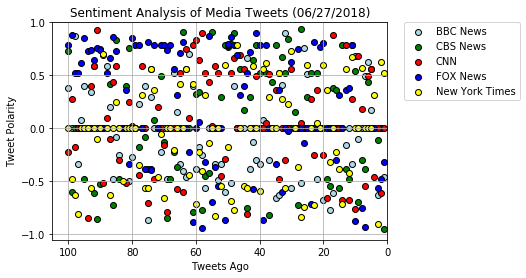

In [27]:
BBC = tweets_df.loc[tweets_df["SearchTerm"] == "@BBCNews", :].sort_values("TweetsAgo", ascending=False)
plt.scatter(BBC["TweetsAgo"], BBC["Compound"], marker="o", facecolors="lightblue", edgecolors="black", label="BBC News")

CBS = tweets_df.loc[tweets_df["SearchTerm"] == "@CBSNews", :].sort_values("TweetsAgo", ascending=False)
plt.scatter(CBS["TweetsAgo"], CBS["Compound"], marker="o", facecolors="green", edgecolors="black", label="CBS News")

CNN = tweets_df.loc[tweets_df["SearchTerm"] == "@CNN", :].sort_values("TweetsAgo", ascending=False)
plt.scatter(CNN["TweetsAgo"], CNN["Compound"], marker="o", facecolors="red", edgecolors="black", label="CNN")

FOX = tweets_df.loc[tweets_df["SearchTerm"] == "@FOXNews", :].sort_values("TweetsAgo", ascending=False)
plt.scatter(FOX["TweetsAgo"], FOX["Compound"], marker="o", facecolors="blue", edgecolors="black", label="FOX News")

NYT = tweets_df.loc[tweets_df["SearchTerm"] == "@NYTimes", :].sort_values("TweetsAgo", ascending=False)
plt.scatter(NYT["TweetsAgo"], NYT["Compound"], marker="o", facecolors="yellow", edgecolors="black", label="New York Times")


plt.grid(True)
plt.xlim(105,-.05)
plt.ylim(-1.05, 1)
plt.yticks(np.arange(-1, 1.05, .5))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.title("Sentiment Analysis of Media Tweets (06/27/2018)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('SenitmentAnalysis.png', dpi = 150, bbox_inches="tight")
plt.show()

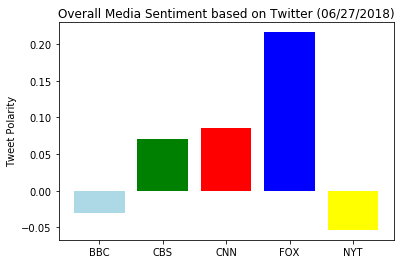

In [30]:
overall_df = pd.DataFrame(overall_tweets)


fig, ax = plt.subplots()

BBC1 = overall_df.loc[overall_df["NewsOutlet"] == "@BBCNews", :]
CBS1 = overall_df.loc[overall_df["NewsOutlet"] == "@CBSNews", :]
CNN1 = overall_df.loc[overall_df["NewsOutlet"] == "@CNN", :]
FOX1 = overall_df.loc[overall_df["NewsOutlet"] == "@FOXNews", :]
NYT1 = overall_df.loc[overall_df["NewsOutlet"] == "@NYTimes", :]

rects1 = ax.bar("BBC", BBC1["Polarity"], color="lightblue")
rects2 = ax.bar("CBS", CBS1["Polarity"], color="green")
rects3 = ax.bar("CNN", CNN1["Polarity"], color="red")
rects4 = ax.bar("FOX", FOX1["Polarity"], color="blue")
rects5 = ax.bar("NYT", NYT1["Polarity"], color="yellow")

plt.ylabel("Tweet Polarity")
plt.title("Overall Media Sentiment based on Twitter (06/27/2018)")

plt.savefig('OverallSentiment.png', dpi = 150)
plt.show()